# Model Training for ZoneTemperature  
This is the model training for classifying labels for the zone temperature. The model deployed will be used for the ZoneTemperature ML model within the ML Pipeline.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from joblib import dump
from methods import MLTraining as mlt

### Read Data

In [23]:
data_pathway = "data/seb/ZoneTemperature_60_Labeled.csv"
df = pd.read_csv(data_pathway, header = 0, index_col = False)

# display (rows, columns)
df.shape

(8400, 27)

### Map Labels
We need to transform all labels from the String type and map them into numbers before using them for training the model. 

In [24]:
label_list = df.label.unique().tolist()
label_list

['Summer Occurrence',
 'Controlled Summer',
 'Controlled Winter',
 'Override Release']

In [25]:
label_dict = mlt.label_list_to_dict(label_list)

df['Label_Numbered'] = [label_dict[x] for x in df['label']]

In [26]:
df['Label_Numbered']

0       0
1       0
2       1
3       1
4       1
       ..
8395    2
8396    2
8397    1
8398    1
8399    2
Name: Label_Numbered, Length: 8400, dtype: int64

In [27]:
y = df["Label_Numbered"]
X = df.drop(columns=["Date","Attr", "label", "Label_Numbered"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Columns for Training Dataset
These are the columns that will be used to train the model (notice they are the 

In [28]:
X.columns

Index(['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00',
       '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00',
       '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'],
      dtype='object')

### DecisionTreeClassifier

0.8708333333333333
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       439
           1       0.89      0.92      0.91       909
           2       0.82      0.75      0.79       273
           3       0.77      0.85      0.81        59

    accuracy                           0.87      1680
   macro avg       0.84      0.84      0.84      1680
weighted avg       0.87      0.87      0.87      1680



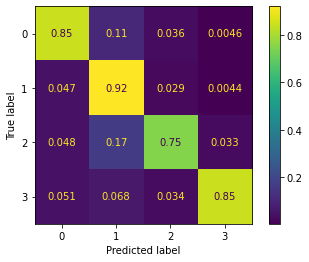

In [29]:
decision_tree, decision_plot = mlt.train_decision_tree(X_train, X_test, y_train, y_test)
decision_plot

## Random Forest

0.9339285714285714
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       439
           1       0.93      0.98      0.95       909
           2       0.94      0.85      0.89       273
           3       0.98      0.81      0.89        59

    accuracy                           0.93      1680
   macro avg       0.95      0.89      0.91      1680
weighted avg       0.93      0.93      0.93      1680



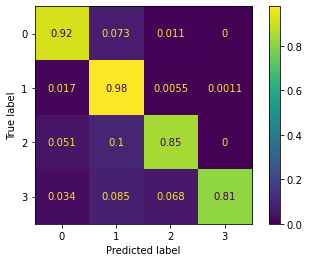

In [30]:
rand_tree, rand_tree_plot = mlt.train_random_forest(X_train, X_test, y_train, y_test)
rand_tree_plot

### K Nearest Neighbor

0.9434523809523809
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       439
           1       0.96      0.96      0.96       909
           2       0.93      0.89      0.91       273
           3       0.91      0.83      0.87        59

    accuracy                           0.94      1680
   macro avg       0.93      0.91      0.92      1680
weighted avg       0.94      0.94      0.94      1680



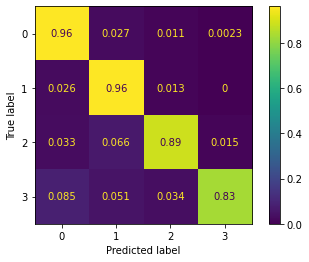

In [31]:
knn_tree, knn_plot = mlt.train_knn(X_train, X_test, y_train, y_test)

### Export Model

In [32]:
dump(rand_tree, 'models/zone_temperature_model.joblib')

['models/zone_temperature_model.joblib']

### Labels used (Order must match when used for ML Pipeline)

In [20]:
label_list

['Summer Occurrence',
 'Controlled Summer',
 'Controlled Winter',
 'Override Release']